In [31]:
# importing librairies 

from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [32]:
#read the dataset

request.urlretrieve ("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv", "births.csv")
births = pd.read_csv("births.csv")


In [33]:
#we're only intrested to 3 decades eventually 

births['decade'] = 10 * (births['year'] // 10)


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


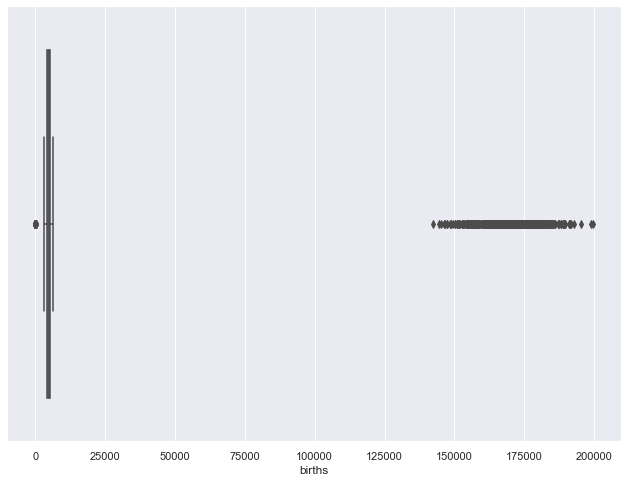

In [34]:
#let's check if there'is any outliers

fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


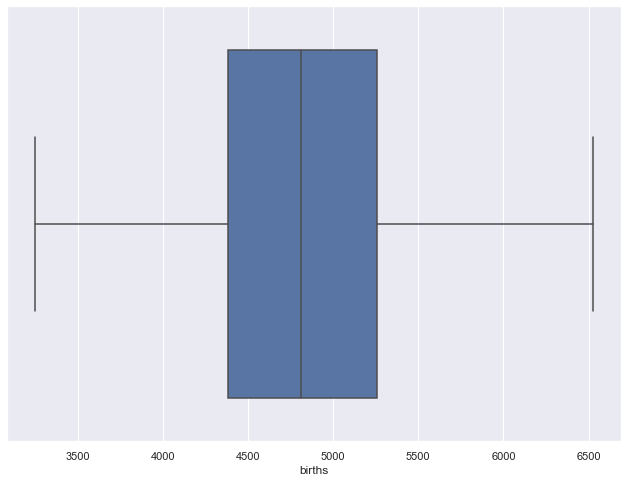

In [35]:
#Now let's clean our data

births = births.query('(births > 1000) & (births < 100000)')
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)


In [36]:
# Days, months and years must be integers.

for field in ["day", "month", "year"]:
    births[field] = births[field].astype(int)

In [37]:
# now let's create a datetime index

births.index = pd.to_datetime(10000 * births.year +100 * births.month +births.day, format='%Y%m%d')

# find out the day of the week

births['dayofweek'] = births.index.dayofweek

C:\Users\pc\AppData\Local\Temp\ipykernel_11272\93681521.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


<Figure size 792x576 with 0 Axes>

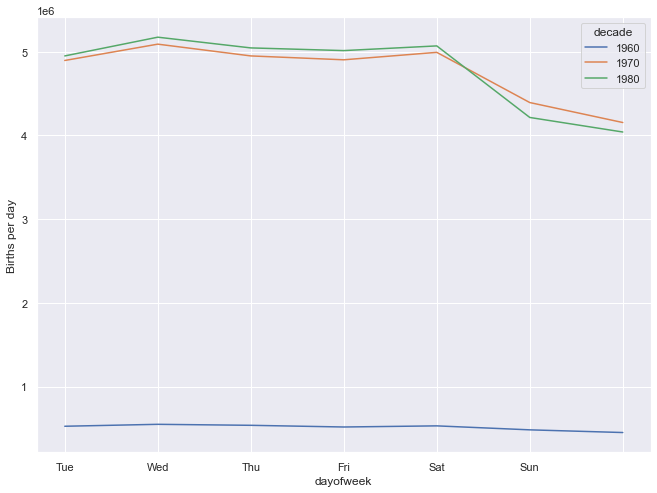

In [38]:
#finally

fig = plt.figure(figsize=(11,8))
births_per_day = births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='sum')
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day');